In [3]:
# import the compulsory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import ndimage, linalg
%matplotlib inline

In [4]:
train_input = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/input_train.npy')
train_all = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/OG_files/fashion_train.npy')
train_labels = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/labels_train.npy')
train_shaped = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/dilated_input.npy')

In [98]:
def pca(input_array):
    mean_vector = input_array.mean(axis = 0)
    cov_matrix = np.cov(input_array - mean_vector)
    return linalg.eigh(cov_matrix)

In [25]:
w, v = pca(train_input)

In [28]:
w.min()

-2.6114392930557447e-09

In [41]:
def lda(input_array, label_array):
    # step one compute d dimensional mean vectors
    _mean_vectors = []
    for i in range(5):
        current_mean_vector = np.mean(input_array[label_array == i], axis = 0)
        _mean_vectors.append(current_mean_vector)
    
    # compute in-between-class and within-class scatter matrix
    s_w = np.zeros((784,784))
    for cl, mv in zip(range(5), _mean_vectors):
        class_sc_matrix = np.zeros((784,784)) # for each class
        for row in input_array[label_array == cl]:
            row, mv = row.reshape(784,1), mv.reshape(784,1)
            class_sc_matrix += (row - mv).dot((row - mv).T)
        s_w += class_sc_matrix # we have s_w

    s_b = np.zeros((784,784))
    overall_mean = np.mean(input_array, axis = 0)
    for i, _mean_vector in enumerate(_mean_vectors):
        n = input_array[label_array == i, :].shape[0]
        mean_vec = _mean_vector.reshape(784,1)
        overall_mean = overall_mean.reshape(784,1)
        s_b += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    # compute eigenvectors and eigenvalues
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))
    eig_vals = eig_vals.real
    eig_vecs = eig_vecs.real
    #print(len(eig_vecs[0]))
    eig_vals = eig_vals / np.sum(eig_vals)

    return eig_vals, eig_vecs


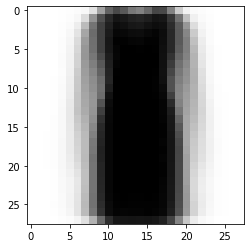

In [20]:
plt.imshow(np.mean(train_shaped[train_labels == 3], axis = 0).reshape(28,28), cmap=plt.cm.gray_r)

In [6]:
np.mean(train_input[train_labels == 3], axis = 0).shape

(784,)

In [88]:
eig_vals, eig_vectors = lda(train_shaped, train_labels)

In [89]:
projector_matrix = np.zeros((3,784))
eig_vals_original = np.copy(eig_vals)
for idx, eigval in enumerate(np.flip(np.sort(eig_vals))[:3]):
    projector_matrix[idx] = eig_vectors[eigval == eig_vals_original]

In [90]:
projector_matrix.T.shape

(784, 3)

In [91]:
transformed = train_input.dot(projector_matrix.T)

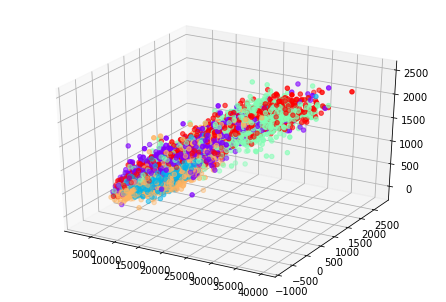

In [92]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(transformed[:,0], transformed[:, 1], transformed[:, 2], c = train_labels, cmap = 'rainbow')

In [93]:
transformed[:,0]

array([15336.97583003,  7050.90860547, 18233.96612785, ...,
       12027.1237725 , 14237.67221639,  9855.08647228])

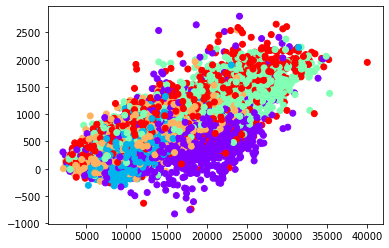

In [94]:
plt.scatter(x = transformed[:,0], y = transformed[:, 1], c = train_labels, cmap = 'rainbow')

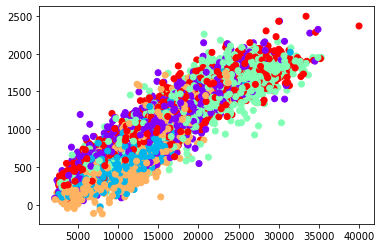

In [95]:
plt.scatter(x = transformed[:,0], y = transformed[:, 2], c = train_labels, cmap = 'rainbow')

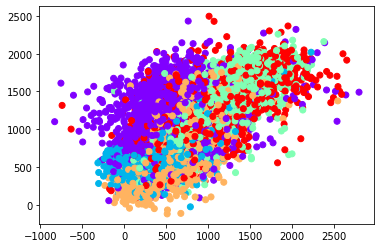

In [96]:
plt.scatter(x = transformed[:,1], y = transformed[:, 2], c = train_labels, cmap = 'rainbow')

In [99]:
eig_vals, eig_vectors = pca(transformed)

In [102]:
projector_matrix = np.zeros((3,10000))
eig_vals_original = np.copy(eig_vals)
for idx, eigval in enumerate(np.flip(np.sort(eig_vals))[:3]):
    projector_matrix[idx] = eig_vectors[eigval == eig_vals_original]

In [104]:
transformed = train_input.dot(projector_matrix)

ValueError: shapes (10000,784) and (3,10000) not aligned: 784 (dim 1) != 3 (dim 0)